<div style='text-align: center; color: purple; font-size: 30px; font-weight: bold; border: 2px solid black; border-radius: 10px; padding: 18px;;'>
     &#9877; Chronic Liver Diesease &#128137; &#129658;
</div>

### <h2 style='; font-weight: bold; font-size:300%; color:blue'><center> 🎯Workflow of the Project 🎯</center></h2>  

   
    
#### 1. <b> Importing Libraries</b><br>
  
    
#### 2. <b>Loading Dataset</b><br>

   
#### 3. <b>Exploatory Data Analysis<br>

    
#### 4. <b>Data Preprocessing<br>
    
    
#### 5. <b>Model building<br>
    
    
#### 6. <b>Model evaluatio<br>
    

 
#### 7. <b> Conclusion<br>
    



 <h2 style='; font-weight: bold; font-size:200%; color:blue'>🗂️Importing Libraries</h2>  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,
ConfusionMatrixDisplay, roc_auc_score, roc_curve , auc, precision_score,recall_score
from sklearn.datasets import make_classification

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

 <h2 style='; font-weight: bold; font-size:200%; color:blue'>&#8987;Loading Dataset</h2>  

In [2]:
from liver import liver

In [3]:
df = pd.read_csv(liver)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


 <h2 style='; font-weight: bold; font-size:200%; color:blue'>&#128269;Exploratory Data Analysis</h2>  

In [5]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 44.7 (16.2)min < med < max:4.0 < 45.0 < 90.0IQR (CV) : 25.0 (2.8),72 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACx0lEQVR4nO3dMY7aQBTG8TdhIQYiG4QEHS1FpBSUHCKHzRFScADEDeiQABnh4GCMU+1qk7As9uBlnvn/+oEpPsHMvPGzybJMANd9uvcEgGs83XsCZTHGNEWkYfERhyzL9reaD+xUMqjGmGav1/vu+3636Gdst9uNMeYHYXVDJYMqIg3f97uTyWQfBEGcd3AYht50Ou2uVquGiBBUB1Q1qCIiEgRB3O/3fxUc3iz6vZbLDpYcZ1Q6qPdgu+xgyXEeQb29wssOlhxvI6glsVh2FF5yVBnnqFCBoEIFggoVWKO+IU3Tuoj4xpi8Q/3T6VQvYUoPjaCeEUVRPUmSb8PhsFar1XLt3JMk8dI0/RrH8U8RKXqGi38Q1DMOh8OT53mt8XgcDwaDTZ6xi8WiO5/PW8fjsVbW/B4RQb2g3W7nPmLabDYcL5WAzRRUIKhQgaBCBYIKFQgqVCCoUIHjKcdYVMSeVfLiNUF1iE1F7FlVL14TVIfYVMREqn3xmqA6qEhF7JVKVsbYTEEFggoVCCpUIKhQgaBCBYIKFQgqVCCoUIGgQgWCChWcLqFatG/k2fqKcTaoNu0beba+epwNqli0b3zkZ+st77M6e5fV5aCKSLH2jY/6bL3tfVaX77I6H1Rcz+Y+q+t3WQlqBVncZ3X2n4jjKahAUKECQYUKBBUqEFSoUOqu3/INdpRB8aK0oNq+wY4yKF4r8xfV6sW5j1wGxf9KP/Av+ga7Ry2D4jw2U1CBoEIFggoVCCpUIKhQgaBCBe6j4oXLbdkJKkTE/bbsBBUi4n5bdoKKv7jalp3NFFQgqFDh3b9+2urABReDSlsduOK9X1Ta6sAJV+36aauDe+N4CjdTZoM2goqbKLtB21VBDcPQy/vFu93OExGJoshbLpetjxyv9bu1zltEZL1ef/E8rzUajUyn0/mdZ+x+v/88m80uVrX+AAwJrf5mKp5CAAAAAElFTkSuQmCC"">",0(0.0%)
2,Gender[object],1. Male2. Female,441 (75.6%)142 (24.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABPklEQVR4nO3bQWrDMBRF0a9iQjORMAYvxovoYrsI7cYYa9CETJRBZqGTOuLpk96zgg+5CcT4hVqrAQrBzM5mdup9CJq61VovvY94NkzT9BVjHHsfgnZKKVsI4dtbcEOMcVyW5ZJSuvY+Bq/b9/0z5zyu63oyM1+xmZmllK7zPP/0PgbNnHsf8JuP3gfg/yA2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUFmMHu8cNf7ELTh+bMcSilbznk0py/c4e9KKZuZ3Xrf8YzBy3tyOXgJTPmg4vmXzeW3E8e5nfJ5naPhOJdTPs9zNBznecrHv+M3w0NdyBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CDjcsrn7R604XbK53WOhuMYvEDmDgpbat8xea00AAAAAElFTkSuQmCC"">",0(0.0%)
3,Total_Bilirubin[float64],Mean (sd) : 3.3 (6.2)min < med < max:0.4 < 1.0 < 75.0IQR (CV) : 1.8 (0.5),113 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACAElEQVR4nO3XvW7aYBSH8fPyJRMRG0QEm5cObB0YWXoHudis2WHmArqzoNgIF2LLfTNUqipVDfELKPk3z2/2ObKsx1/Oe2/AR9d67xMA3qJz6gDnXN/MeoH7S+/9IXAW+O3VUJ1z/fF4fB/H8Shk+W63e3LOPRArznXqidqL43i0WCwOSZIcmyzO8zxaLpej7XbbMzNCxVlOvvrNzJIkOU4mkx8B+/sBM8Bf+JmCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhM41l9d13TWz2DkXuqL03h8ueEoQdbVQi6LoVlX1NU3TdrvdPobsyLJs75x7NLOQeSL/j1wt1LIsO1EU3czn8+N0On1qOr/ZbG5Xq9W3NE3vQkI/M3KzX59FPwNnuUku7E2h5nkeNV283+8bz/ypqqpOFEU3s9nMDYfD5yazWZYN1ut1cOR1XXeLovgyGAy+t1qtqun8BW6Sz+jZe//P6/UC3GR17Fg808UAAAAASUVORK5CYII="">",0(0.0%)
4,Direct_Bilirubin[float64],Mean (sd) : 1.5 (2.8)min < med < max:0.1 < 0.3 < 19.7IQR (CV) : 1.1 (0.5),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSklEQVR4nO3Xu47aQBiG4X84yRxkg0hMR5PCXQpKmtxBLnbb9O65AIq0CION8MKCHKeJ0kTJrm3I7pe8T80/M8U7MLiyLA1461qvfQDgJTrPfcA51zezXs31L2VZnmrOAj/9MVTnXH86nX72fX9SZ/HD4bB3zj0QK5p67hu15/v+ZLlcnoIgOFdZOMsyL47jSZIkPTMjVDTy7E+/mVkQBOcwDB9rrN+vMQP8gj9TkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokNC55+JFUXTNzHfO1V3iUpbl6YZHgqi7hZrnefd6vX6cz+ftdrt9rrPG4XDYO+ceiBV3C/VyuX

In [5]:
df.shape

(583, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Statistical Description

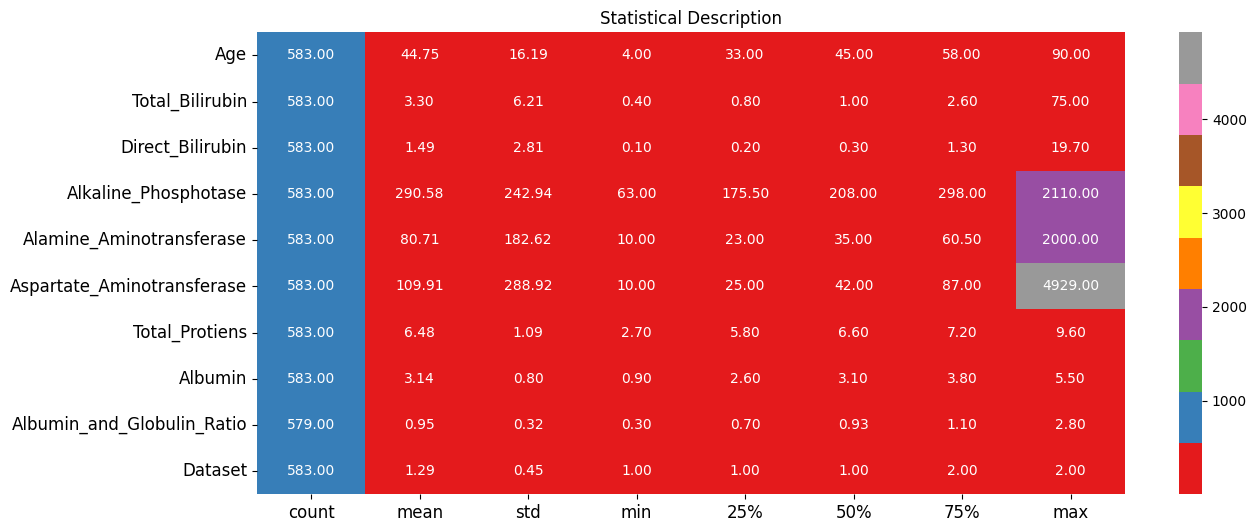

In [7]:
plt.figure(figsize=(14,6))
sns.heatmap(df.describe().T, annot=True, cmap='Set1', fmt=".2f")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.title('Statistical Description')
plt.show()

In [6]:
# from skimpy import skim
# skim(df)

### **Finding the null values**

In [9]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
#Filling the null values by median
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median()
                                        , inplace = True)

### **Finding the duplicate values and removing them**

In [11]:
df.duplicated().sum()

13

In [12]:
df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
df = df.reset_index(drop=True)

In [13]:
df.shape

(570, 11)

In [14]:
num_var = df.select_dtypes(include=['int', 'float']).keys()
num_var

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### Visualization

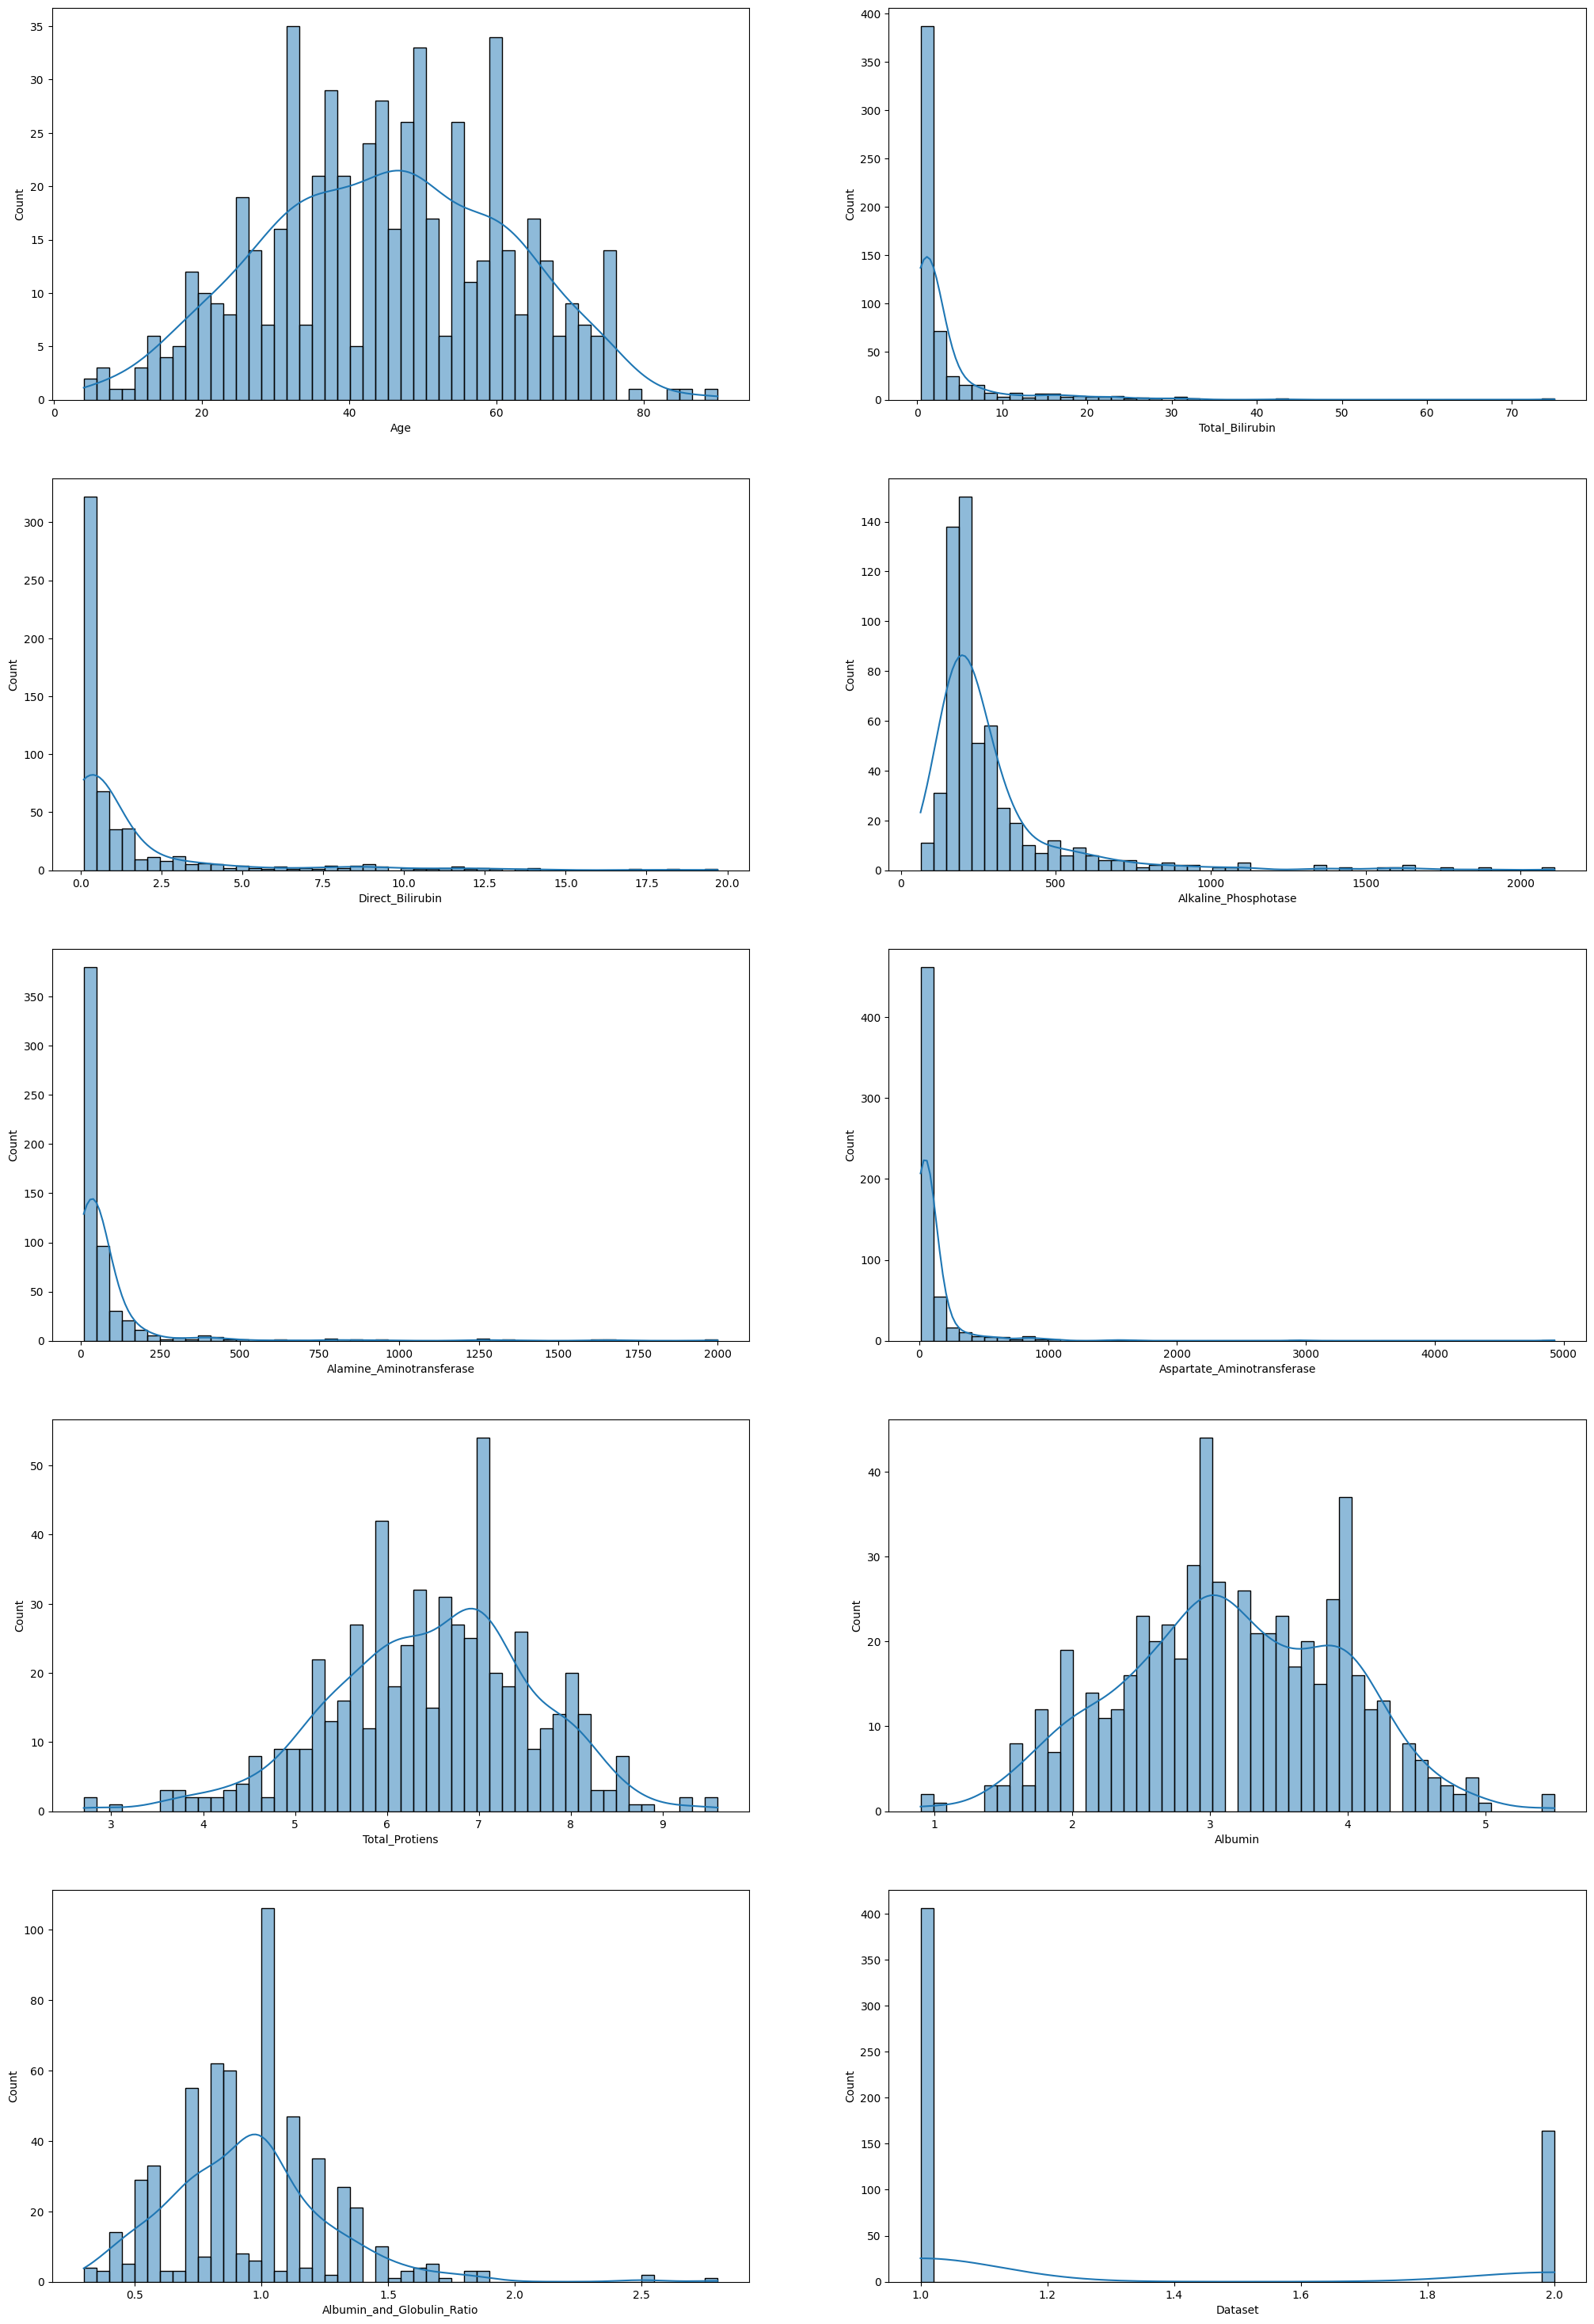

In [15]:
plt.figure(figsize=(25,45))
for i, var in enumerate(num_var):
    plt.subplot(6,2,i+1)
    sns.histplot(df[var], kde=True, bins=50)

                     Total no. of Unique Values
Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64


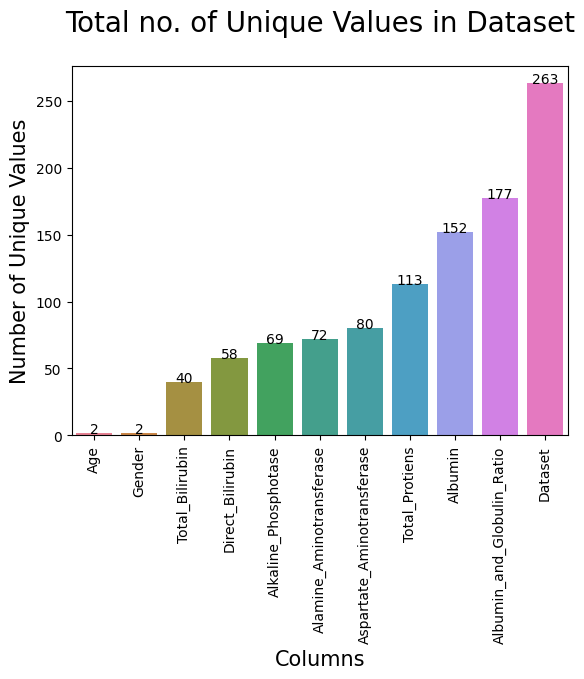

In [16]:
unique = df.nunique()
print('=='*30)
print('  '*10, 'Total no. of Unique Values')
print('=='*30)
print(unique)
print('=='*30)
ax=  sns.barplot(x= unique.index, y = unique.sort_values(), palette='husl')
plt.xticks(rotation=90, fontsize= 10)
plt.yticks( fontsize= 10 )
plt.xlabel('Columns',fontsize=15)
plt.ylabel('Number of Unique Values', fontsize=15)
plt.title('Total no. of Unique Values in Dataset', fontsize=20, pad= 25)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), ha='center', va='baseline')

In [17]:
df['Dataset'].replace({2:'Hepatic', 1:'Non-hepatic'},inplace = True)

Total Number of Males and Females are:  Gender
Male      430
Female    140
Name: count, dtype: int64
Number of Males and Females having Liver diesease are : Gender
Male      115
Female     49
Name: count, dtype: int64
Number of Males and Females Not having Liver diesease are :  Gender
Male      315
Female     91
Name: count, dtype: int64


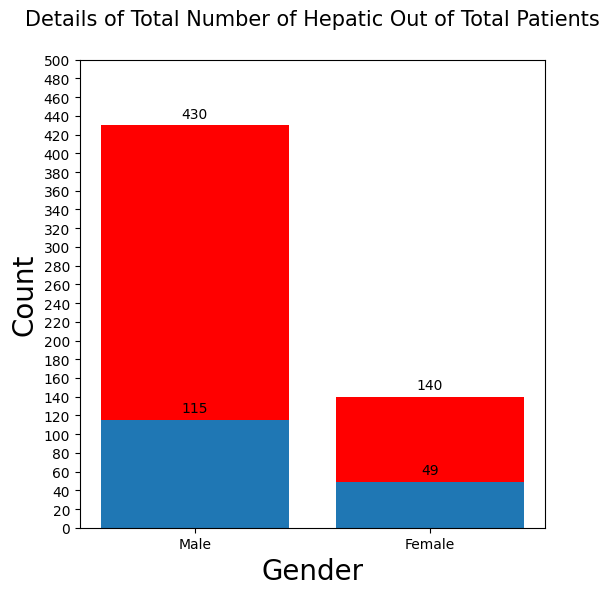

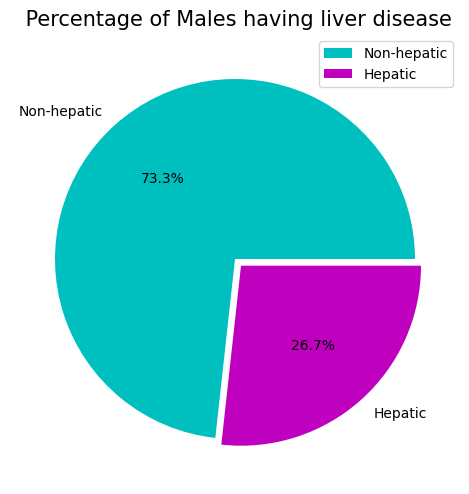

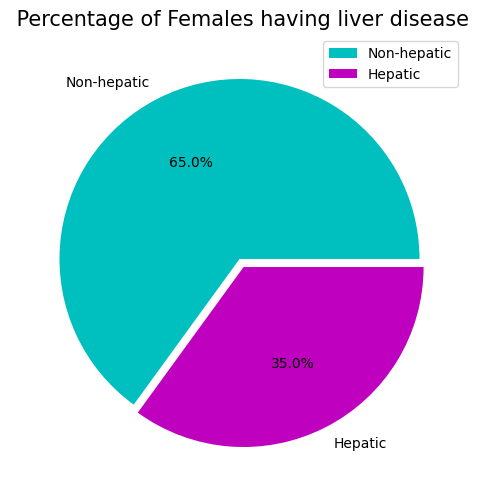

In [18]:
x = df[(df.Dataset =='Hepatic')]['Gender'].value_counts()
print("\033[1mTotal Number of Males and Females are:\033[0m ", 
      df.Gender.value_counts())
print("="*70)
print("\033[1mNumber of Males and Females having Liver diesease are :\033[0m",
      df[df['Dataset']=='Hepatic']['Gender'].value_counts())
print("="*70)
print("\033[1mNumber of Males and Females Not having Liver diesease are :\033[0m ",
      df[df['Dataset']=='Non-hepatic']['Gender'].value_counts())
print("="*70)
plt.figure(figsize=(6,6))
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values, color='red')
plt.bar(x.index, x.values)
plt.subplots_adjust(bottom=0.1)
plt.yticks(range(0, 501, 20))
plt.xlabel('Gender', size=20)
plt.ylabel('Count', size=20)
plt.title("Details of Total Number of Hepatic Out of Total Patients", size=15, pad=25)
for i, value in enumerate(df['Gender'].value_counts().values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

for i, value in enumerate(x.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

print("="*70)

labels =df[(df.Gender =='Male')]['Dataset'].value_counts().index
plt.pie(df[(df.Gender =='Male')]['Dataset'].value_counts(), explode=[0,0.05], 
        autopct='%1.1f%%', labels = labels,
       colors=['c',  'm'])

plt.legend(loc='upper right')
plt.tight_layout()
plt.title(' Percentage of Males having liver disease', size=15)
plt.show()
print("="*70)

labels =df[(df.Gender =='Female')]['Dataset'].value_counts().index
plt.pie(df[(df.Gender =='Female')]['Dataset'].value_counts(), explode=[0,0.05], 
        autopct='%1.1f%%', labels = labels,
       colors=['c',  'm'])

plt.legend(loc='upper right')
plt.tight_layout()
plt.title(' Percentage of Females having liver disease', size=15)
plt.show()
print("="*70)

### Finding the Correlation among the features

In [19]:
df['Dataset'].replace({'Hepatic':1, 'Non-hepatic':0},inplace = True)
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)

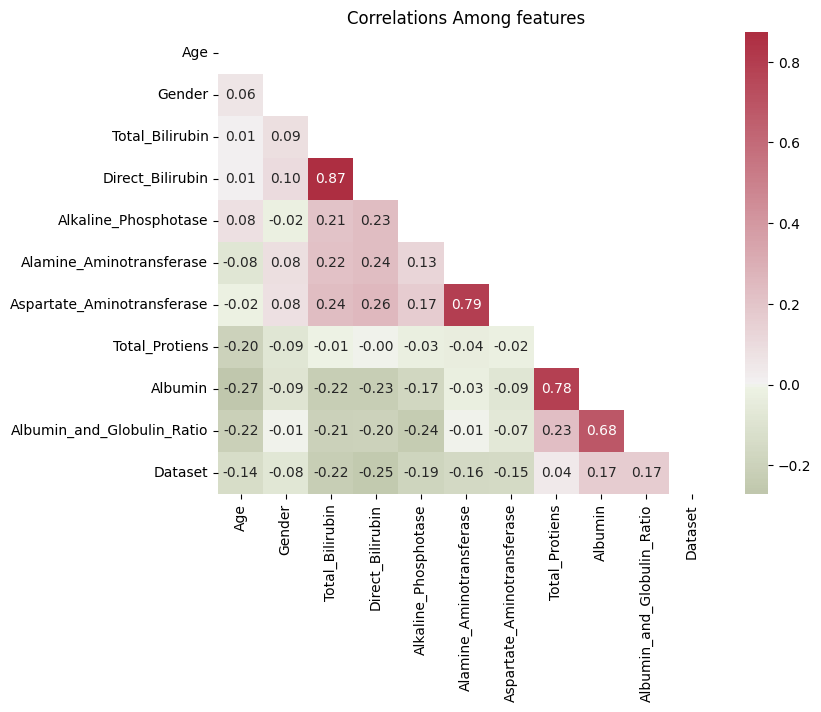

In [21]:
data_mask=np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', 
                             as_cmap = True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cmap = cmap, fmt = '.2f', center = 0, 
            mask = data_mask)
plt.title('Correlations Among features')
plt.show()

After creating a heatmap to visualize the correlation between variables in your dataset, it is noticed that there is a strong correlation between variables <font color="red">**Direct_Bilirubin**</font> and <font color="red">**Total Bilirubin**</font>. This implies that when one of these variables changes, the other tends to change in a consistent manner.  

Similarly, it is also observed a significant correlation between variables:   
<font color="red">**Aspartate_Aminotransferase**</font> and <font color="red">**Alamine_Aminotransferase**</font><br>
<font color="red">**Albumin**</font> and <font color="red">**Total_Protiens**</font><br>
<font color="red">**Albumin_and_Globulin_Ratio**</font> and <font color="red">**Albumin**</font>.


It can create issues when interpreting the model and lead to unstable coefficient estimates. Feature Selection, Combine Variables, Regularization techniques, Principal Component Analysis, Collecting More data etc are the various approaches to deal with Multicollinearity.  

PCA can help mitigate multicollinearity by creating a new set of orthogonal variables that are uncorrelated with each other. When you have highly correlated features, PCA transforms them into a smaller set of principal components that still capture most of the important information in the original features. This can help in reducing the impact of multicollinearity on your modeling. But before doing PCA, Standardize or normalize the data, as PCA is sensitive to the scale of features.

### Encoding

In [22]:
df['Gender']=df['Gender'].astype('category')
df['Gender'] =df['Gender'].cat.codes

### Splitting into target and independent features

In [23]:
x = df.drop(columns='Dataset')
y = df['Dataset']

### Checking for the imbalance data in target features

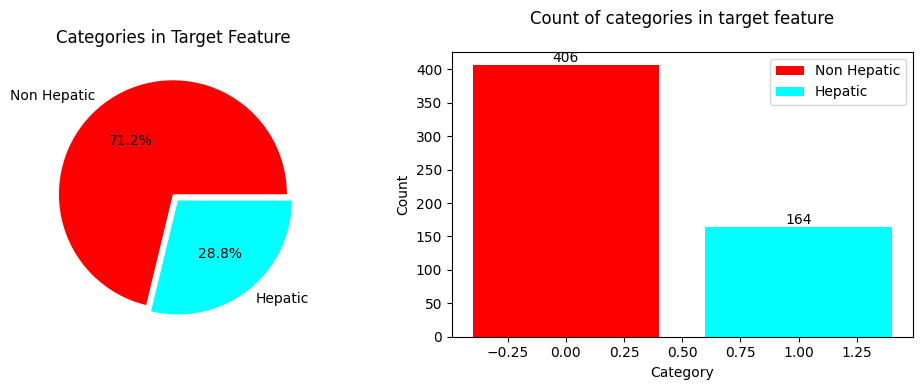

In [24]:
imb_data= df.Dataset.value_counts()
# Creating a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the pie chart on the first subplot
axes[0].pie(x=imb_data.values, explode=(0, 0.07), autopct='%1.1f%%', 
            colors=['red', 'cyan'], labels=['Non Hepatic', 'Hepatic'])
axes[0].set_title('Categories in Target Feature')

# Plotting the bar plot on the second subplot
axes[1].bar(imb_data.index, imb_data.values, color=['red', 'cyan'], 
            label=['Non Hepatic', 'Hepatic'])
for index, value in enumerate(imb_data.values):
    axes[1].text(index, value, str(value), ha='center', va='bottom')
axes[1].set_title('Count of categories in target feature', pad=20)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].legend()

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled_data = pd.DataFrame(scaled, columns=x.columns)
scaled_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.241741,-1.752549,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150447
1,1.056874,0.570597,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.653221
2,1.056874,0.570597,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.181870
3,0.810385,0.570597,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.163788
4,1.673096,0.570597,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.721618


In [26]:
from sklearn.decomposition import PCA

# Extract the columns that are highly correlated
highly_correlated_columns = ['Aspartate_Aminotransferase','Alamine_Aminotransferase',
                             'Albumin','Total_Protiens',
                             'Albumin_and_Globulin_Ratio', 'Direct_Bilirubin',
                             'Total_Bilirubin']

# Create a new dataframe with only the highly correlated columns
df_subset = scaled_data[highly_correlated_columns]

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_subset)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['Aspartate_Aminotransferase_pca',
                                                'Alamine_Aminotransferase_pca', 
                                                'Albumin_pca','Total_Protiens_pca',
                                                'Albumin_and_Globulin_Ratio_pca', 
                                                'Direct_Bilirubin_pca',
                                                'Total_Bilirubin_pca'])

# Concatenate the original dataframe's non-correlated columns with the PCA dataframe
non_correlated_columns = [col for col in scaled_data.columns
                          if col not in highly_correlated_columns]
final_df = pd.concat([scaled_data[non_correlated_columns], pca_df], axis=1)

# Now final_df contains the original non-correlated columns along with the PCA components

In [27]:
final_df.head()

,Age,Gender,Alkaline_Phosphotase,Aspartate_Aminotransferase_pca,Alamine_Aminotransferase_pca,Albumin_pca,Total_Protiens_pca,Albumin_and_Globulin_Ratio_pca,Direct_Bilirubin_pca,Total_Bilirubin_pca
0,1.241741,-1.752549,-0.427421,-0.726567,-0.309483,0.003516,-0.389450,0.006601,0.050760,-0.008135
1,1.056874,0.570597,1.661722,1.080233,0.792998,-1.589418,-0.637895,-0.027668,-0.155366,0.033879
2,1.056874,0.570597,0.808927,0.465460,0.501526,-1.011503,-0.161236,-0.051840,-0.199662,-0.068244
3,0.810385,0.570597,-0.447823,-0.826272,-0.108885,-0.072780,-0.127108,0.043899,0.008028,0.005067
4,1.673096,0.570597,-0.394778,0.794847,-0.819606,-0.523126,-1.674676,-0.023479,-0.113740,0.393347



<h2 style='; font-weight: bold; font-size:200%; color:blue'> 🛠️ Model Building, Predicting and Evaluation of Model</h2> 

In [28]:
mlogic =LogisticRegression()
mrandomforest = RandomForestClassifier()
mkneighbour = KNeighborsClassifier()
mbagg = BaggingClassifier()
svc =SVC()
estimators = {'Logistic Regression': mlogic, 'Randomforest Classifier': mrandomforest,
             'KNeighbour': mkneighbour, 'Bagging': mbagg, 'SupportVectorClassifier': svc}

In [29]:
X = final_df
y = y

### Imbalanced Data Treatment using SMOTE:   
SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address the issue of imbalanced data in machine learning. Imbalanced data occurs when the number of instances in one class (usually the minority class) is much lower than the number of instances in another class (usually the majority class). This can lead to poor performance of machine learning models, as they may struggle to learn from the minority class due to its scarcity.

SMOTE works by creating synthetic samples for the minority class by interpolating between existing instances. Here's how it generally works

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Spliting the data into Train and Test Data

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,
                                                    test_size=0.2, random_state=42)

### Model Building, Predicting and Evaluation of Model (Without Tuning)

In [32]:
for model_name, model in estimators.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\033[34;2m{model_name}\033[0m")
    print(f"\033[1mAccuracy Score is\033[0m ,\033[1m{accuracy_score(y_test, y_pred)*100}\033[0m")
    print(f"\033[1mConfusion Matrix\033[0m\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"\033[1mClassification Report:-\033[0m\n{classification_report(y_test, y_pred)}")
    print("==="*40)

Logistic Regression
Accuracy Score is ,73.61963190184049
Confusion Matrix
[[40 32]
 [11 80]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        72
           1       0.71      0.88      0.79        91

    accuracy                           0.74       163
   macro avg       0.75      0.72      0.72       163
weighted avg       0.75      0.74      0.73       163

Randomforest Classifier
Accuracy Score is ,84.66257668711657
Confusion Matrix
[[54 18]
 [ 7 84]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        72
           1       0.82      0.92      0.87        91

    accuracy                           0.85       163
   macro avg       0.85      0.84      0.84       163
weighted avg       0.85      0.85      0.84       163

KNeighbour
Accuracy Score is ,77.30061349693251
Confusion Matrix
[[46 26]
 [11 80]]

Classification Report

### Tuned Models (Hyperparameter Tuning)

In [33]:
classifiers = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42),
        "param_grid": {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    "KNeighbour": {
        "model": KNeighborsClassifier(),
        "param_grid":  {'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
        }
    },
    "Bagging": {
        "model": BaggingClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
        }
    },
    "SupportVectorClassifier": {
        "model": SVC(),
        "param_grid":{'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
        }
    }
}

In [34]:
print(f"\033[1m                        Tuned Models\033[0m")
for classifier_name, params in classifiers.items():
    classifier = params["model"]
    param_grid = params["param_grid"]
    
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
        
    
    print(f"\n\033[34;2mBest parameters for {classifier_name}:\033[0m {best_params}")
    
    # Train the best model on the training data
    best_model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(x_test)

    # Calculate accuracy

    print(f"\033[1mAccuracy Score is\033[0m ,\033[1m{accuracy_score(y_test, y_pred)*100}\033[0m")
    print(f"\033[1mConfusion Matrix\033[0m\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"\033[1mClassification Report:-\033[0m\n{classification_report(y_test, y_pred)}")
    print("=" * 50)

                        Tuned Models

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Accuracy Score is ,74.23312883435584
Confusion Matrix
[[40 32]
 [10 81]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.80      0.56      0.66        72
           1       0.72      0.89      0.79        91

    accuracy                           0.74       163
   macro avg       0.76      0.72      0.72       163
weighted avg       0.75      0.74      0.73       163


Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy Score is ,84.04907975460122
Confusion Matrix
[[51 21]
 [ 5 86]]

Classification Report:-
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        72
           1       0.80      0.95      0.87        91

    accuracy                           0.84       163
   macro avg       0.86      0.83      0.83       163
w

### ROC AUC Curve

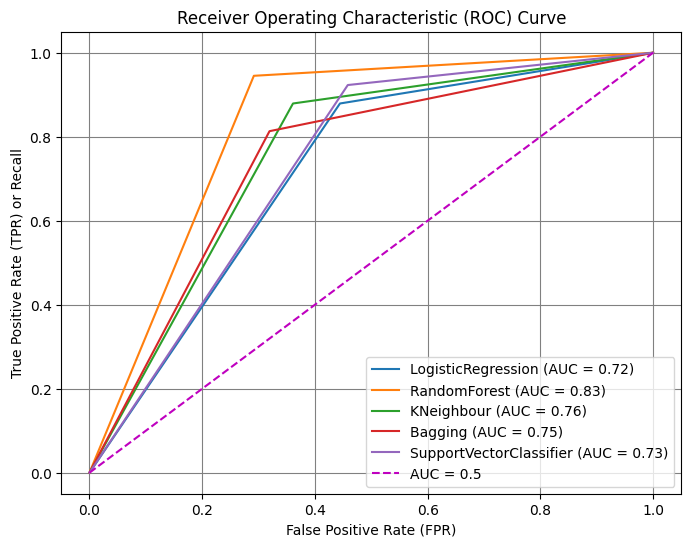

In [35]:
# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))

for name, info in classifiers.items():
    model = info["model"]
    model.fit(x_train,y_train)
    
    y_pred_test = model.predict(x_test)
    y_test_binary = (y_test == 1).astype(int)
    y_pred_test_binary = (y_pred_test == 1).astype(int)
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_test_binary, pos_label=1)  
    roc_auc = auc(fpr, tpr)
    
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(color='gray')

# Show the plot
plt.show()

 <h2 style='; font-weight: bold; font-size:200%; color:blue'>📝Conclusion</h2>  

<font color="red" size="5">Logistic Regression:</font>

AUC (Area Under the ROC Curve): 0.72 & Accuracy: 0.74   
Explanation: The logistic regression model has an AUC of 0.72, indicating its ability to discriminate between positive and negative instances. The AUC value ranges from 0 to 1, with 0.5 indicating random guessing and 1 indicating perfect separation. An AUC of 0.72 suggests the model's performance is better than random chance, but there is room for improvement. The accuracy of 0.74 means that 74% of the predictions made by the model are correct.    


<font color="red" size="5">Random Forest:</font>

AUC: 0.83 & Accuracy: 0.84   
Explanation: The random forest model outperforms logistic regression with an AUC of 0.83, indicating higher discriminatory power. Additionally, the accuracy of 0.84 suggests that 84% of the predictions are correct. Random forests are an ensemble of decision trees, and their ability to combine multiple trees often leads to better performance than individual models like logistic regression.

<font color="red" size="5">K-Nearest Neighbors (KNN):</font>

AUC: 0.76 & Accuracy: 0.80   
Explanation: The k-NN model has an AUC of 0.76, suggesting moderate discriminatory ability. The accuracy of 0.80 means that 80% of the predictions are correct. k-NN classifies a new instance based on its proximity to k nearest neighbors in the training data. It's worth noting that k-NN's performance might be sensitive to the choice of k and the distance metric.
    
    
    
<font color="red" size="5">Bagging Classifier:</font>

AUC: 0.75 & Accuracy: 0.81   
Explanation: Bagging is an ensemble technique that combines multiple models for improved performance. The AUC of 0.75 indicates decent discriminatory power. The accuracy of 0.81 suggests that 81% of the predictions are correct. Bagging often reduces overfitting and enhances model generalization by averaging the predictions of multiple base models.

<font color="red" size="5">Support Vector Classifier (SVC):</font>

AUC: 0.73 & Accuracy: 0.75   
Explanation: The SVC model has an AUC of 0.73, suggesting reasonable but not exceptional discriminatory ability. The accuracy of 0.75 means that 75% of the predictions are correct. SVC aims to find a hyperplane that best separates different classes in the data space.

<font color="Green" size="5">Summary:</font>

1) Among the models mentioned, Random Forest has the highest AUC (0.83) and Accuracy (0.84), indicating the best overall performance.   
2) Bagging and k-NN also show relatively good performance in terms of AUC and Accuracy.   
3) Logistic Regression and SVC exhibit slightly lower AUC and Accuracy values, suggesting they might need further improvement or tuning.